# Montelibretti $CO_2$ time series
The $CO_2$ concentration is produced by a [Picarro Analyzer](https://www.picarro.com/products/gas_concentration_analyzers/carbon_dioxide_co2) installed in the CNR research area of Montelibretti (RM).

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from matplotlib import dates
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)
print("matplotlib version: %s"%mpl.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4


## The Picarro dataset

In [5]:
picarro_df = pd.read_excel('data/picarro_minutely.xlsx')

In [7]:
picarro_df.head()

,Time,CH4,CH4_dry,CO2,CO2_dry,H2O,h2o_reported
0,2023-06-08 11:22:00,1.945788,1.989567,406.688497,417.951100,1.714517,1.645709
1,2023-06-08 11:23:00,1.946628,1.989451,407.938034,418.978307,1.677644,1.612259
2,2023-06-08 11:24:00,1.946999,1.989701,407.908749,418.916785,1.671803,1.606928
3,2023-06-08 11:25:00,1.946900,1.989730,407.580503,418.621114,1.676941,1.611602
4,2023-06-08 11:26:00,1.944438,1.989896,405.337447,417.010065,1.782102,1.706881


We want to resample the data from minutes to hours. We first need to use the time as the index of the dataframe

In [10]:
time_index = pd.to_datetime(picarro_df['Time'])
picarro_df.drop('Time', axis=1, inplace=True)

In [12]:
picarro_time_index_df = picarro_df.set_index(time_index)

In [14]:
picarro_time_index_df.head()

,CH4,CH4_dry,CO2,CO2_dry,H2O,h2o_reported
Time,,,,,,
2023-06-08 11:22:00,1.945788,1.989567,406.688497,417.951100,1.714517,1.645709
2023-06-08 11:23:00,1.946628,1.989451,407.938034,418.978307,1.677644,1.612259
2023-06-08 11:24:00,1.946999,1.989701,407.908749,418.916785,1.671803,1.606928
2023-06-08 11:25:00,1.946900,1.989730,407.580503,418.621114,1.676941,1.611602
2023-06-08 11:26:00,1.944438,1.989896,405.337447,417.010065,1.782102,1.706881


In [16]:
co2_df = picarro_time_index_df.drop(['CH4', 'CH4_dry', 'CO2', 'H2O', 'h2o_reported'], axis=1)
co2_df.head()

,CO2_dry
Time,
2023-06-08 11:22:00,417.951100
2023-06-08 11:23:00,418.978307
2023-06-08 11:24:00,418.916785
2023-06-08 11:25:00,418.621114
2023-06-08 11:26:00,417.010065


## Resampling
We resample, more precisely downsample, the records from minutes to hours. The hourly value is the mean value of the minute values within each hour.

In [21]:
co2_hour_df = co2_df.resample('H').mean()
co2_hour_df.head()

,CO2_dry
Time,
2023-06-08 11:00:00,419.430160
2023-06-08 12:00:00,421.598710
2023-06-08 13:00:00,418.990947
2023-06-08 14:00:00,417.442359
2023-06-08 15:00:00,416.346272


## $CO_2$ time series visualization

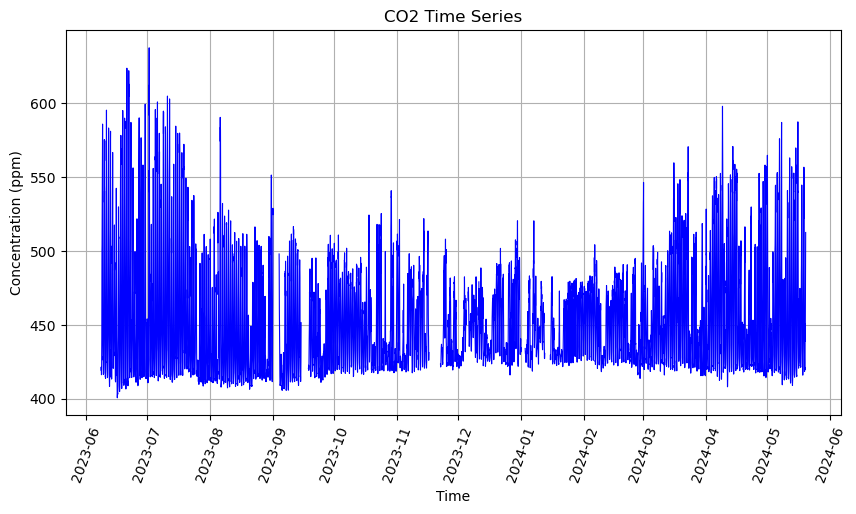

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('CO2 Time Series')
ax.set_ylabel('Concentration (ppm)')
ax.set_xlabel('Time')
ax.set_xticks(co2_hour_df.index)
ax.set_xticklabels(co2_hour_df.index, rotation=70)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
co2_plt = ax.plot(co2_hour_df, linewidth=0.8, color='blue')

In [28]:
co2_hour_df.to_csv('./data/picarro_co2_hour.csv')